In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [ ]:
# import sys
# import os
# py_file_location = "/content/drive/MyDrive/liver-imaging-analysis/engine"
# sys.path.append(os.path.abspath(py_file_location))
# !pip install monai
# !pip install -U scikit-image

In [ ]:
# !pip install torchvision
# !pip install torch
# !pip install matplotlib
# !pip install monai
# !pip install nibabel
# !pip install -U scikit-learn scipy matplotlib
# !pip install -U numpy 
# !pip install tensorboard

Compile Status
-------------------------------
Loss= DiceLoss(
  (normalization): Sigmoid()
) 

Optimizer= Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.01
    maximize: False
    weight_decay: 0
) 

Metrics= ['dice_score', 'loss'] 


Data Status
-------------------------------
volume path: C:/GP-Dr.Meena-LiverSeg/demo/volume\volume-0.nii mask path: C:/GP-Dr.Meena-LiverSeg/demo/mask\segmentation-0.nii
Batch Shape of Training Features: (1, 1, 256, 256, 64) torch.float32
Batch Shape of Training Labels: (1, 1, 256, 256, 64) torch.float32

Prediction
-------------------------------
(512, 512, 210)


(1, 1, 256, 256, 64)

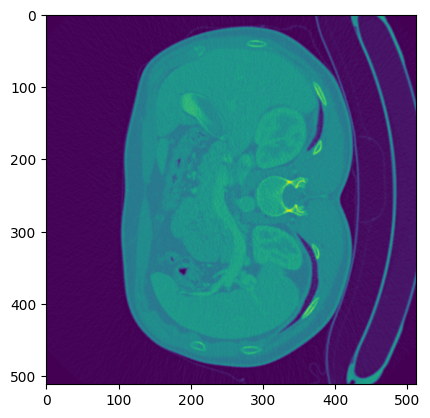

In [1]:
import unet
import nibabel
import engine
import torch
import json
from torch import nn
import diceloss


#Run on GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"

#A class that adds Engine methods to the model
class NeuralNetwork(unet.UNet3D,engine.Engine):
    def __init__(self):
        engine.Engine.__init__(self,device=device)        
        unet.UNet3D.__init__(self,1,1,device=device)

#Read configurations from JSON File
with open('../config/configs.json') as f:
    config = json.load(f)


#Instance from the Model
model=NeuralNetwork().to(device)

#Choose loss function, optimizer, and metrics
model.compile(loss=diceloss.DiceLoss(),\
              optimizer= torch.optim.Adam(model.parameters(),\
              lr=config['optimizer']['learning_rate']),\
              metrics=['dice_score','loss'])

#Print loss function, optimizer, and metrics
print("Compile Status")
print("-------------------------------")
model.compile_status()

#Load Dataset
model.load_data(training_data_path=config['dataset']['testing'],\
                testing_data_path=config['dataset']['testing'],\
                transformation_flag=True,\
                transformation=config['transformation_size'],\
                batchsize=config['batch_size'],test_valid_split=0)

#Print Dataset Shape
print("\nData Status")
print("-------------------------------")
model.data_status()

#Load Stored Checkpoint
model.load_checkpoint(config['model checkpoint'])

# #Start Fitting
# print("\nTraining")
# print("-------------------------------")
# model.fit(epochs=config['epochs'])

# #Test model on testing set
# print("\nTesting")
# model.evaluate_test()
# print("-------------------------------")

#Predict mask for a single volume
print("\nPrediction")
print("-------------------------------")
ImagePath=config['ImagePath']
output=model.predict(ImagePath)
output.shape


In [ ]:
model.save_checkpoint("TESTT")
import matplotlib.pyplot as plt
plt.plot(model.totalloss)

In [ ]:
model.evaluate_test()

In [ ]:
#Predict mask for a single volume
import matplotlib.pyplot as plt
print("\nPrediction")
print("-------------------------------")
ImagePath=config['ImagePath']
output=model.predict(ImagePath)
output.shape
plt.imshow(output[0,0,:,:,32].cpu())